In [1]:
pip install sklearn-features


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import joblib as jb
import missingno
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn_features.transformers import DataFrameSelector
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import Ridge , Lasso

In [4]:
df=pd.read_csv("D:\work\housing_project\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


<Axes: >

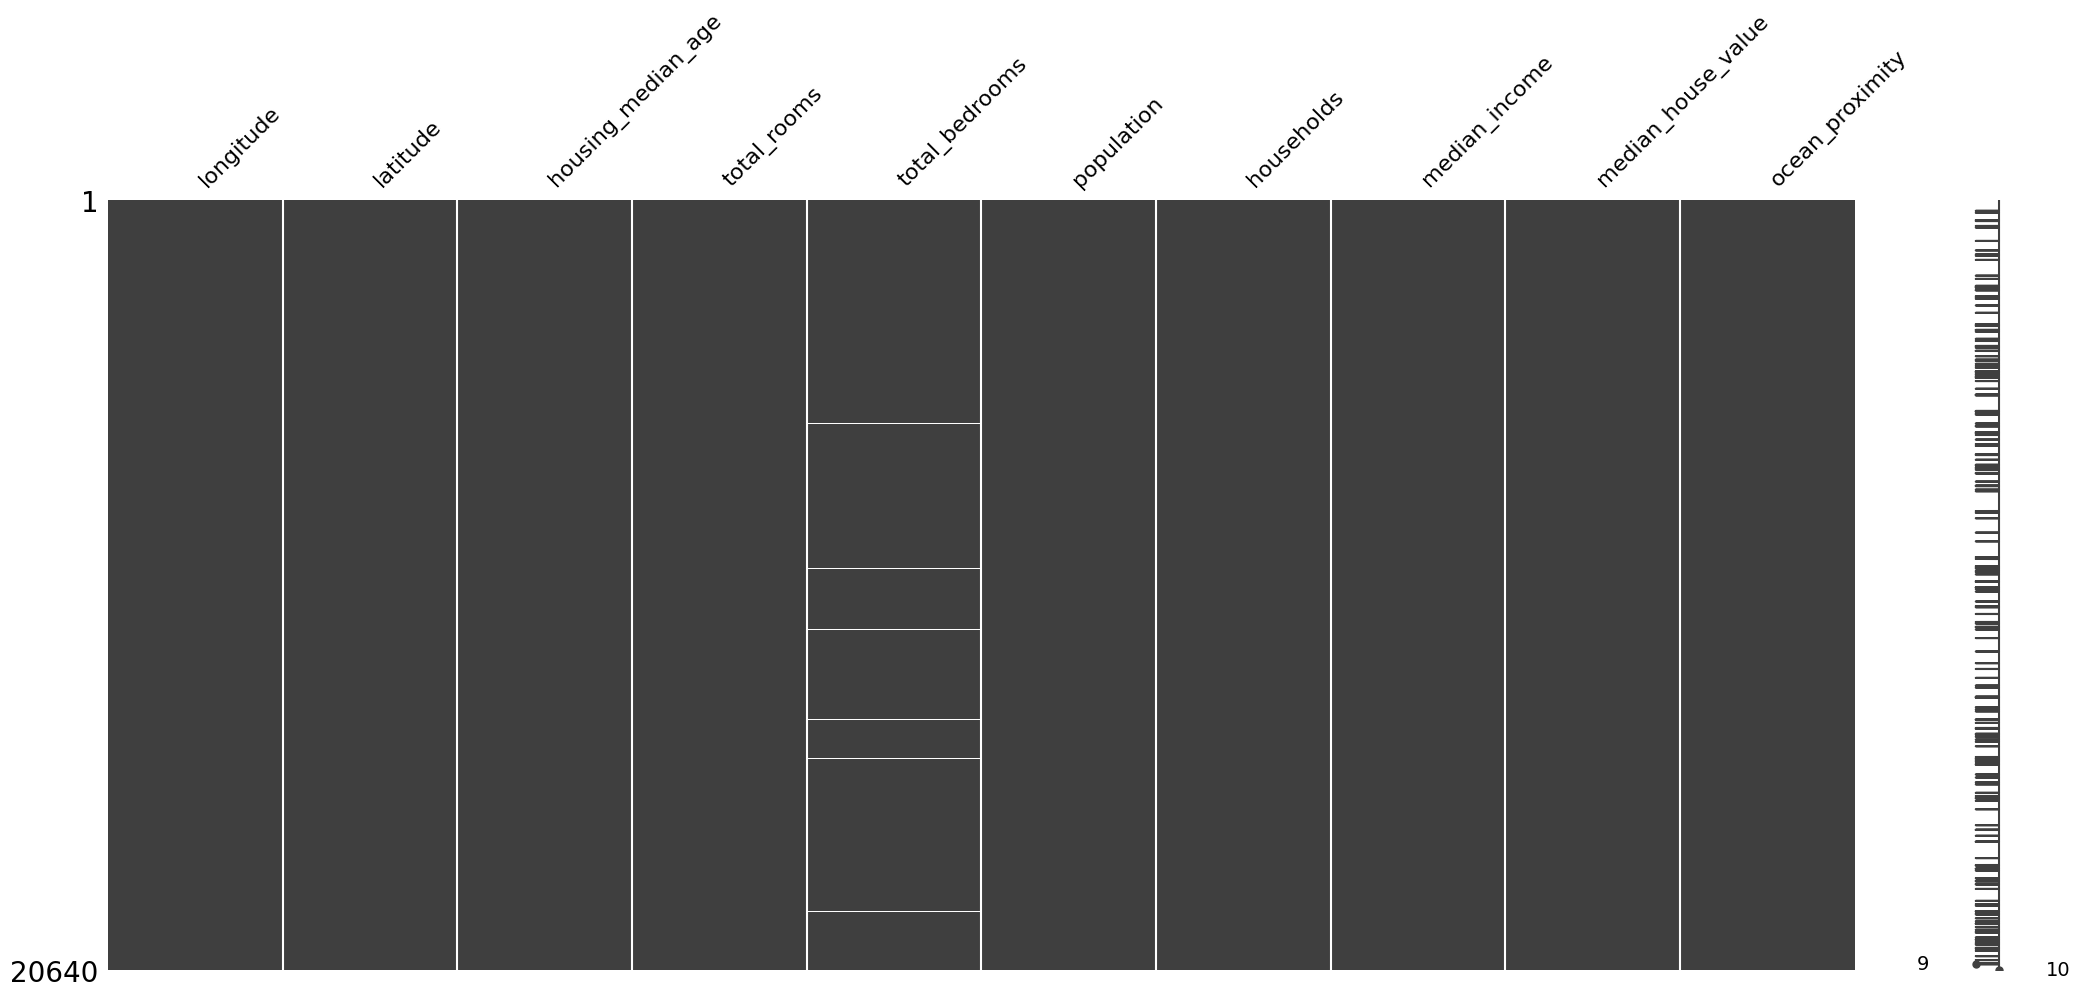

In [7]:
missingno.matrix(df)

##Exploratory data_anlisize


univariante visualization


In [5]:
ocean_values = df['ocean_proximity'].unique()
replicats = df['ocean_proximity'].value_counts()
replicats.index


Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')

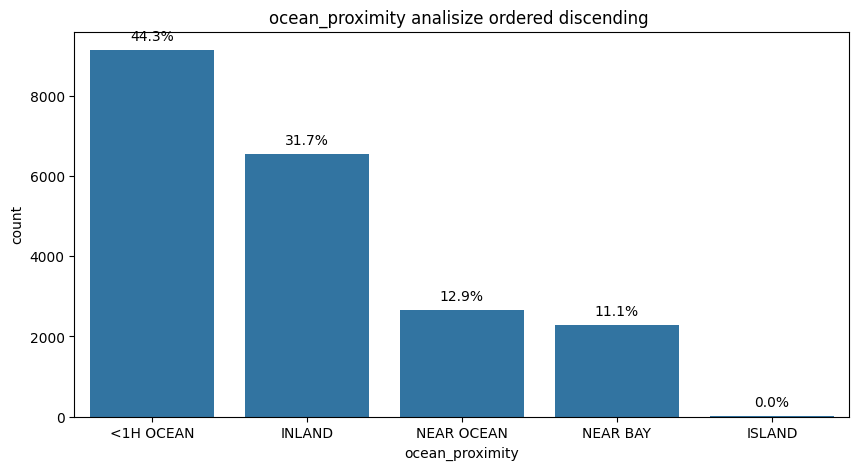

In [9]:
plt.figure(figsize=(10,5))
ax   = sns.countplot (x='ocean_proximity',data=df,order= replicats.index )
plt.title('ocean_proximity analisize ordered discending ')
plt.xlabel ('ocean_proximity')
plt.ylabel('count')
total = len(df['ocean_proximity'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # Get x position of bar
    y = p.get_height()  # Get y position of bar (height)
    ax.annotate(percentage, (x, y), ha='center', va='center',  # Annotate with percentage
                xytext=(0, 10), textcoords='offset points')

In [6]:
df['ocean_proximity']=  df['ocean_proximity'].replace('<1H OCEAN','1H OCEAN')

In [11]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

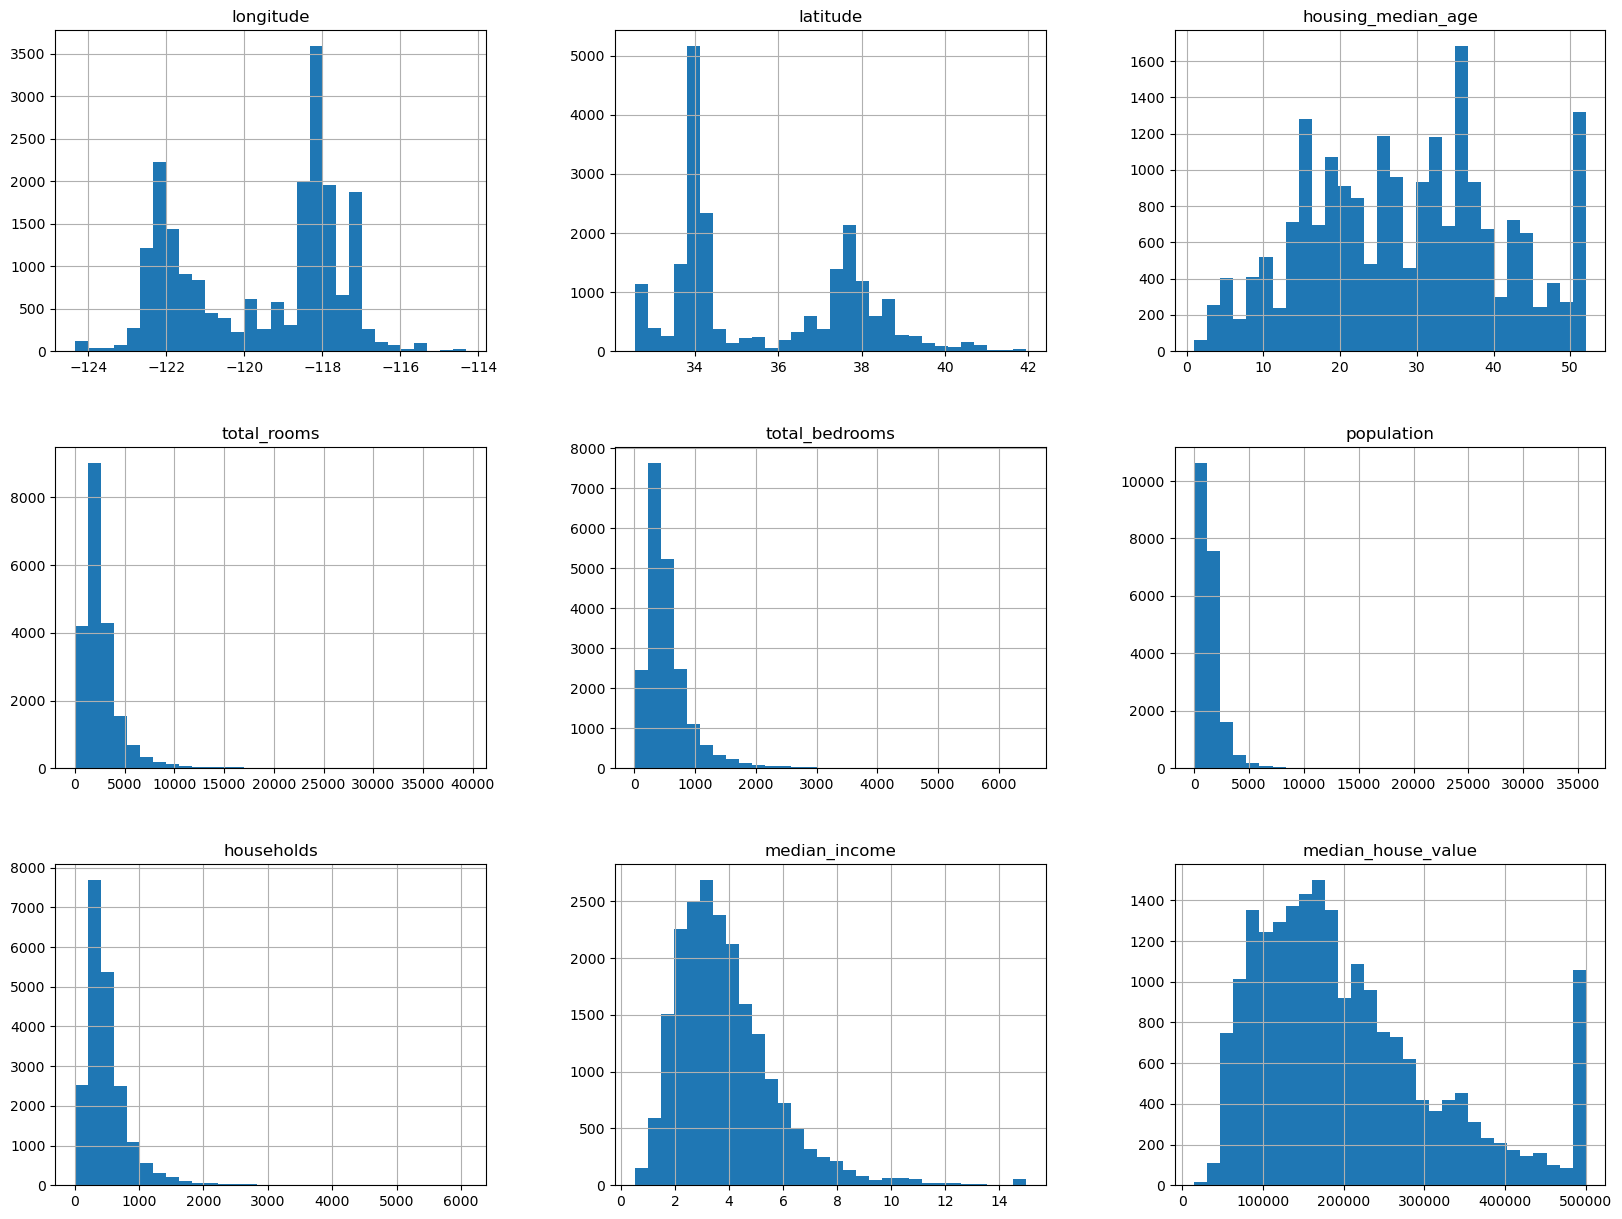

In [7]:
#histgram to numerical feature in dataset
# the better distribution to input on model normal distribution
df.hist(bins = 30 , figsize=(20,15))
plt.show()


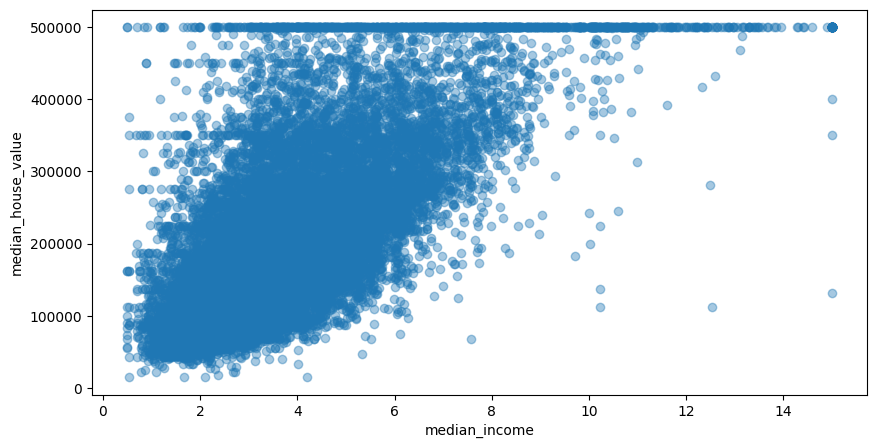

In [13]:
##scatterplot with important feature (median_income) with a target median_house value
plt.figure(figsize=(10,5))
plt.scatter(x=df['median_income'],y=df['median_house_value'],alpha =.4)
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

In [14]:

df['median_house_value'].describe()

,median_house_value
count,20640.000000
mean,206855.816909
std,115395.615874
min,14999.000000
25%,119600.000000
50%,179700.000000
75%,264725.000000
max,500001.000000


In [177]:
df['median_house_value']

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


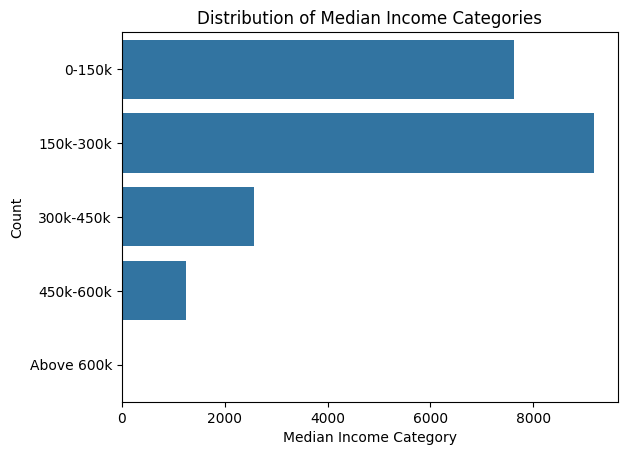

In [179]:

import pandas as pd
import numpy as np
# Assuming df is your DataFrame and it has already been loaded as shown in the provided code.

# Define the bins for categorization. You can adjust these as needed.
bins = [0, 150000, 300000, 450000, 600000, np.inf]  # Example bins, modify as desired
labels = ['0-150k', '150k-300k', '300k-450k', '450k-600k', 'Above 600k'] # Corresponding labels

# Create the new 'median_house_value_category' colum
house_value_bins = pd.cut(x=df['median_house_value'], bins=bins, labels=labels,right=True )
sns.countplot(house_value_bins)
plt.xlabel('Median Income Category')
plt.ylabel('Count')
plt.title('Distribution of Median Income Categories')
plt.show()

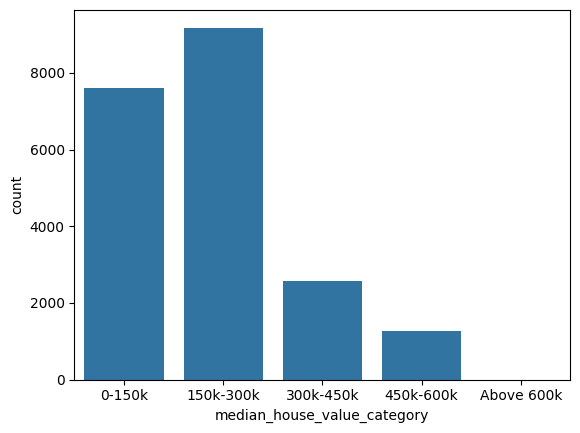

In [16]:
sns.countplot(x= df['median_house_value_category'])
plt.show()

you can useful from this univariant that the magorty in median house_value in 150-300 and
can useing staratgy named stratifcation to happen balanced in data

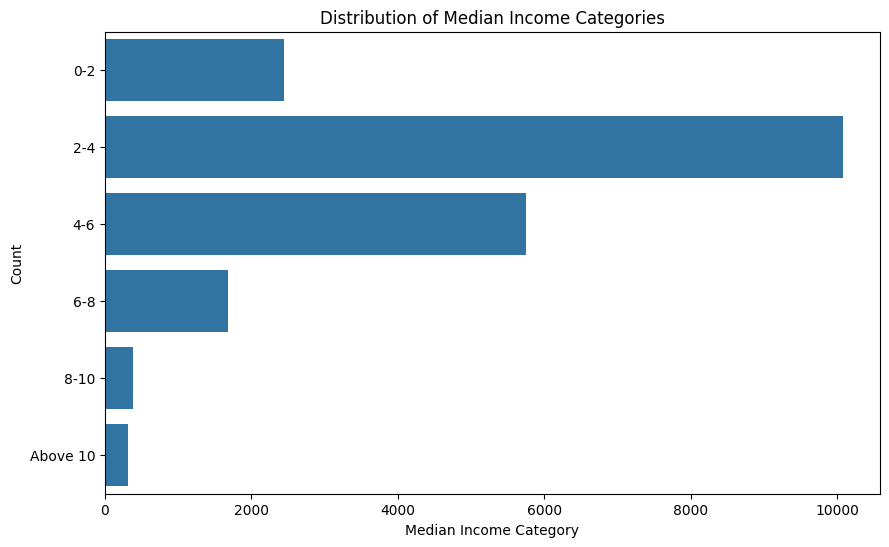

In [182]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame and it has already been loaded as shown in the provided code.

# Define the bins for median_income categorization.
bins = [0, 2, 4, 6, 8, 10, np.inf]  # Example bins, modify as desired
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', 'Above 10'] # Corresponding labels

# Create the new 'median_income_category' column using pd.cut
meadian_income_category = pd.cut(df['median_income'], bins=bins, labels=labels, right=False)

# Use sns.countplot to visualize the distribution of median_income categories.
plt.figure(figsize=(10, 6))
sns.countplot(meadian_income_category)
plt.xlabel('Median Income Category')
plt.ylabel('Count')
plt.title('Distribution of Median Income Categories')
plt.show()

#you can usefule from this uninvariant to magorty im median income is 2-4k in month so that when train_test split you can keep this presetage between category about stratifcation this methodStratification in machine learning is a method used when splitting data into training and testing sets. It ensures that the proportion of each class (like Pass/Fail) remains the same in both sets. This helps the model to perform better, especially with imbalanced data.


#bivarinat viusalization

In [226]:
df.shape

(20640, 14)

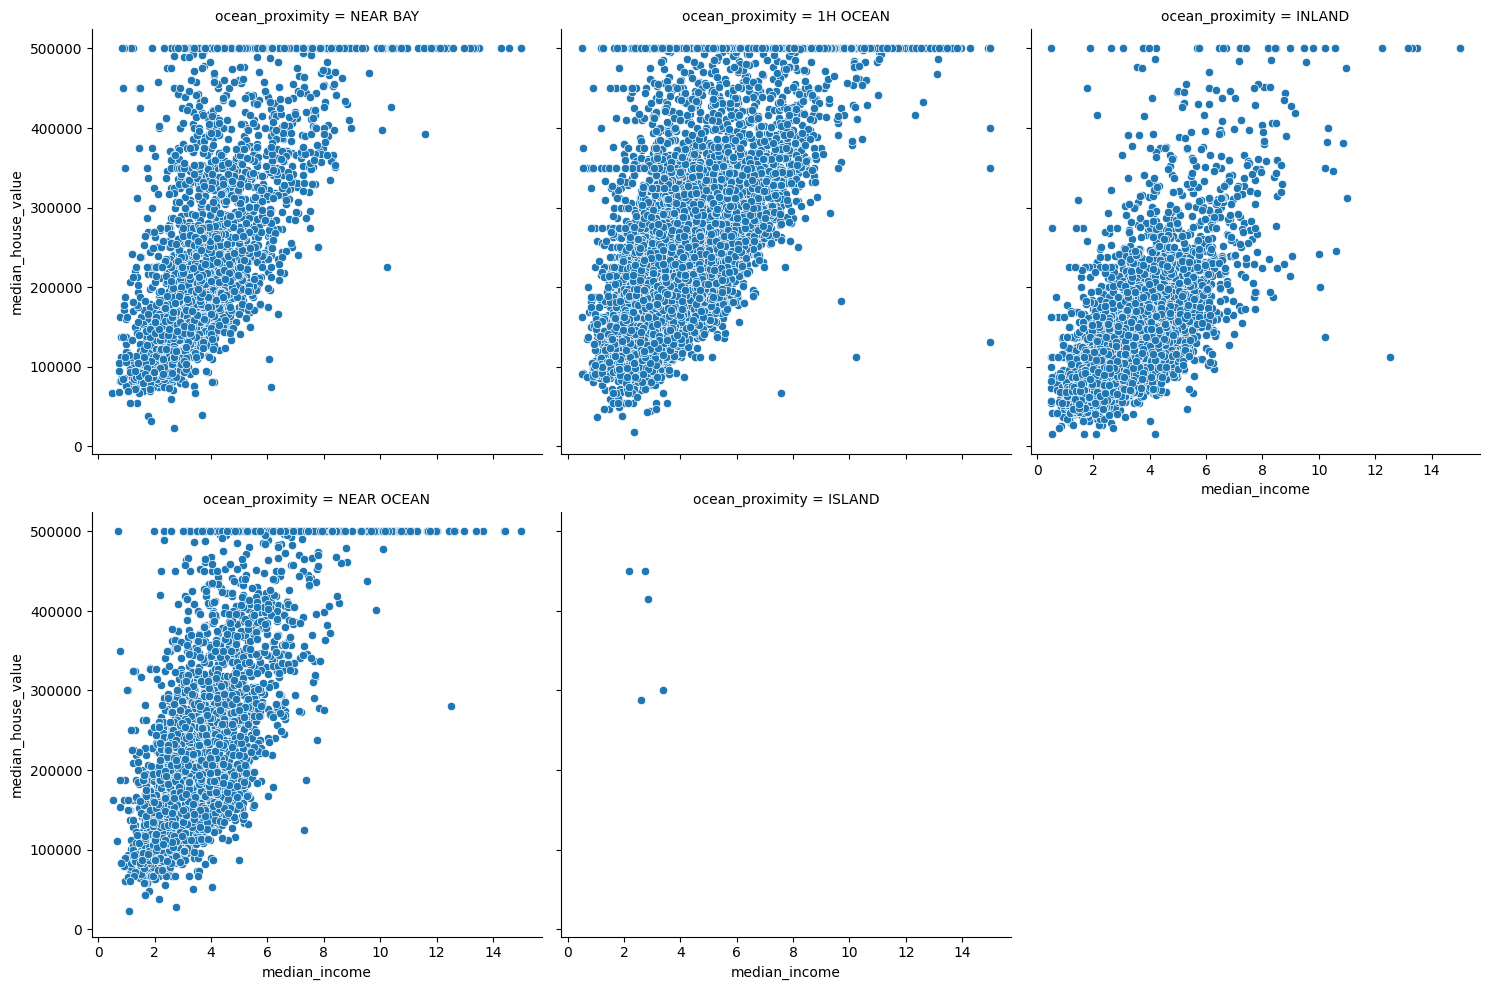

In [224]:
from functools import wraps
from textwrap import wrap
sns.relplot(x=df['median_income'],y=df['median_house_value'],col= df['ocean_proximity'],col_wrap=3)
plt.show()

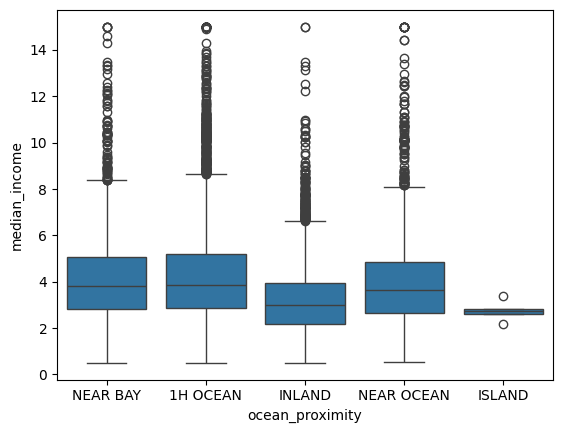

In [19]:
sns.boxplot(x=df['ocean_proximity'],y=df['median_income'])
plt.show()

from this boxplot use can think to this feature is dont important because this boxplot is the same and in the same range and from scatter plot five category hase the same distribution
so that this is not important feature


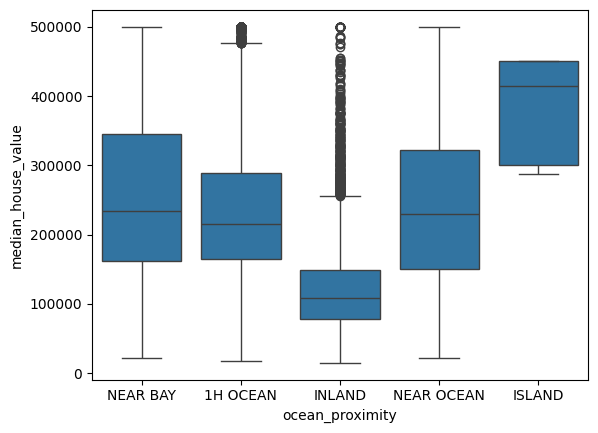

In [20]:
sns.boxplot(x=df['ocean_proximity'],y=df['median_house_value'])
plt.show()

from this you can think this feature is less important because التنوع in box plot so that i input in model but dont effect large



#multivariate visualization


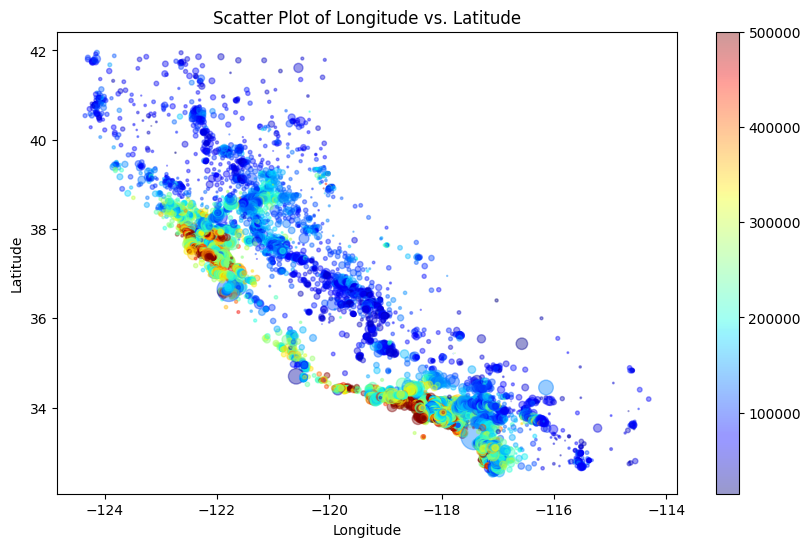

In [21]:
# prompt: use plt.sactter between longtiude and latitude

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['longitude'], df['latitude'], alpha=0.4,s= df['population']/100,c=df['median_house_value'], cmap = 'jet')
plt.colorbar(sc)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs. Latitude')
plt.show()


i can think to the median house value increase on sea


#feature engneering

In [8]:
num_cols = df.select_dtypes(include = 'number').columns


In [9]:
df[num_cols].corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

as i think to median_income is the importantest feture in this dataset because it is high correlation with median_house_value


In [10]:
# prompt: feature engnearing do some of operation between feature to improve corr

# Calculate the ratio of total_bedrooms to total_rooms
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Display the updated DataFrame with the new features
print(df[['total_rooms', 'total_bedrooms', 'population', 'households', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']].head())
num_cols = df.select_dtypes(include = 'number').columns
correlation_matrix = df[num_cols].corr()
print(correlation_matrix['median_house_value'].sort_values(ascending=False))


   total_rooms  total_bedrooms  population  households  rooms_per_household  \
0        880.0           129.0       322.0       126.0             6.984127   
1       7099.0          1106.0      2401.0      1138.0             6.238137   
2       1467.0           190.0       496.0       177.0             8.288136   
3       1274.0           235.0       558.0       219.0             5.817352   
4       1627.0           280.0       565.0       259.0             6.281853   

   bedrooms_per_room  population_per_household  
0           0.146591                  2.555556  
1           0.155797                  2.109842  
2           0.129516                  2.802260  
3           0.184458                  2.547945  
4           0.172096                  2.181467  
median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bed

In [11]:
df[num_cols].corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [12]:
x = df.drop('median_house_value',axis=1)
y = df['median_house_value']


In [238]:
x.shape

(20640, 13)

In [13]:
x_train_full , x_test_full , y_train_full, y_test_full  = train_test_split(x,y , shuffle = True , random_state=42,test_size=.15)
x_train_full

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4602,-118.27,34.05,12.0,535.0,328.0,1194.0,365.0,1.2012,1H OCEAN,1.465753,0.613084,3.271233
6978,-118.03,33.97,32.0,2468.0,552.0,1190.0,479.0,3.8275,1H OCEAN,5.152401,0.223663,2.484342
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,INLAND,5.000000,0.200000,2.752688
2549,-124.17,40.79,43.0,2285.0,479.0,1169.0,482.0,1.9688,NEAR OCEAN,4.740664,0.209628,2.425311
11025,-117.82,33.79,26.0,2641.0,633.0,3657.0,617.0,4.1339,1H OCEAN,4.280389,0.239682,5.927066
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,1H OCEAN,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,1H OCEAN,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,1H OCEAN,6.395349,0.166993,3.178891


In [240]:
 print("x_train_shape "  , x_train_full.shape)
 print ("x_test_shape "  , x_test_full.shape)
 print ("y_train_shape "  , y_train_full.shape)
 print ("y_test_shape "  , y_test_full.shape)

x_train_shape  (17544, 13)
x_test_shape  (3096, 13)
y_train_shape  (17544,)
y_test_shape  (3096,)


#Dealing with nulls



<Axes: >

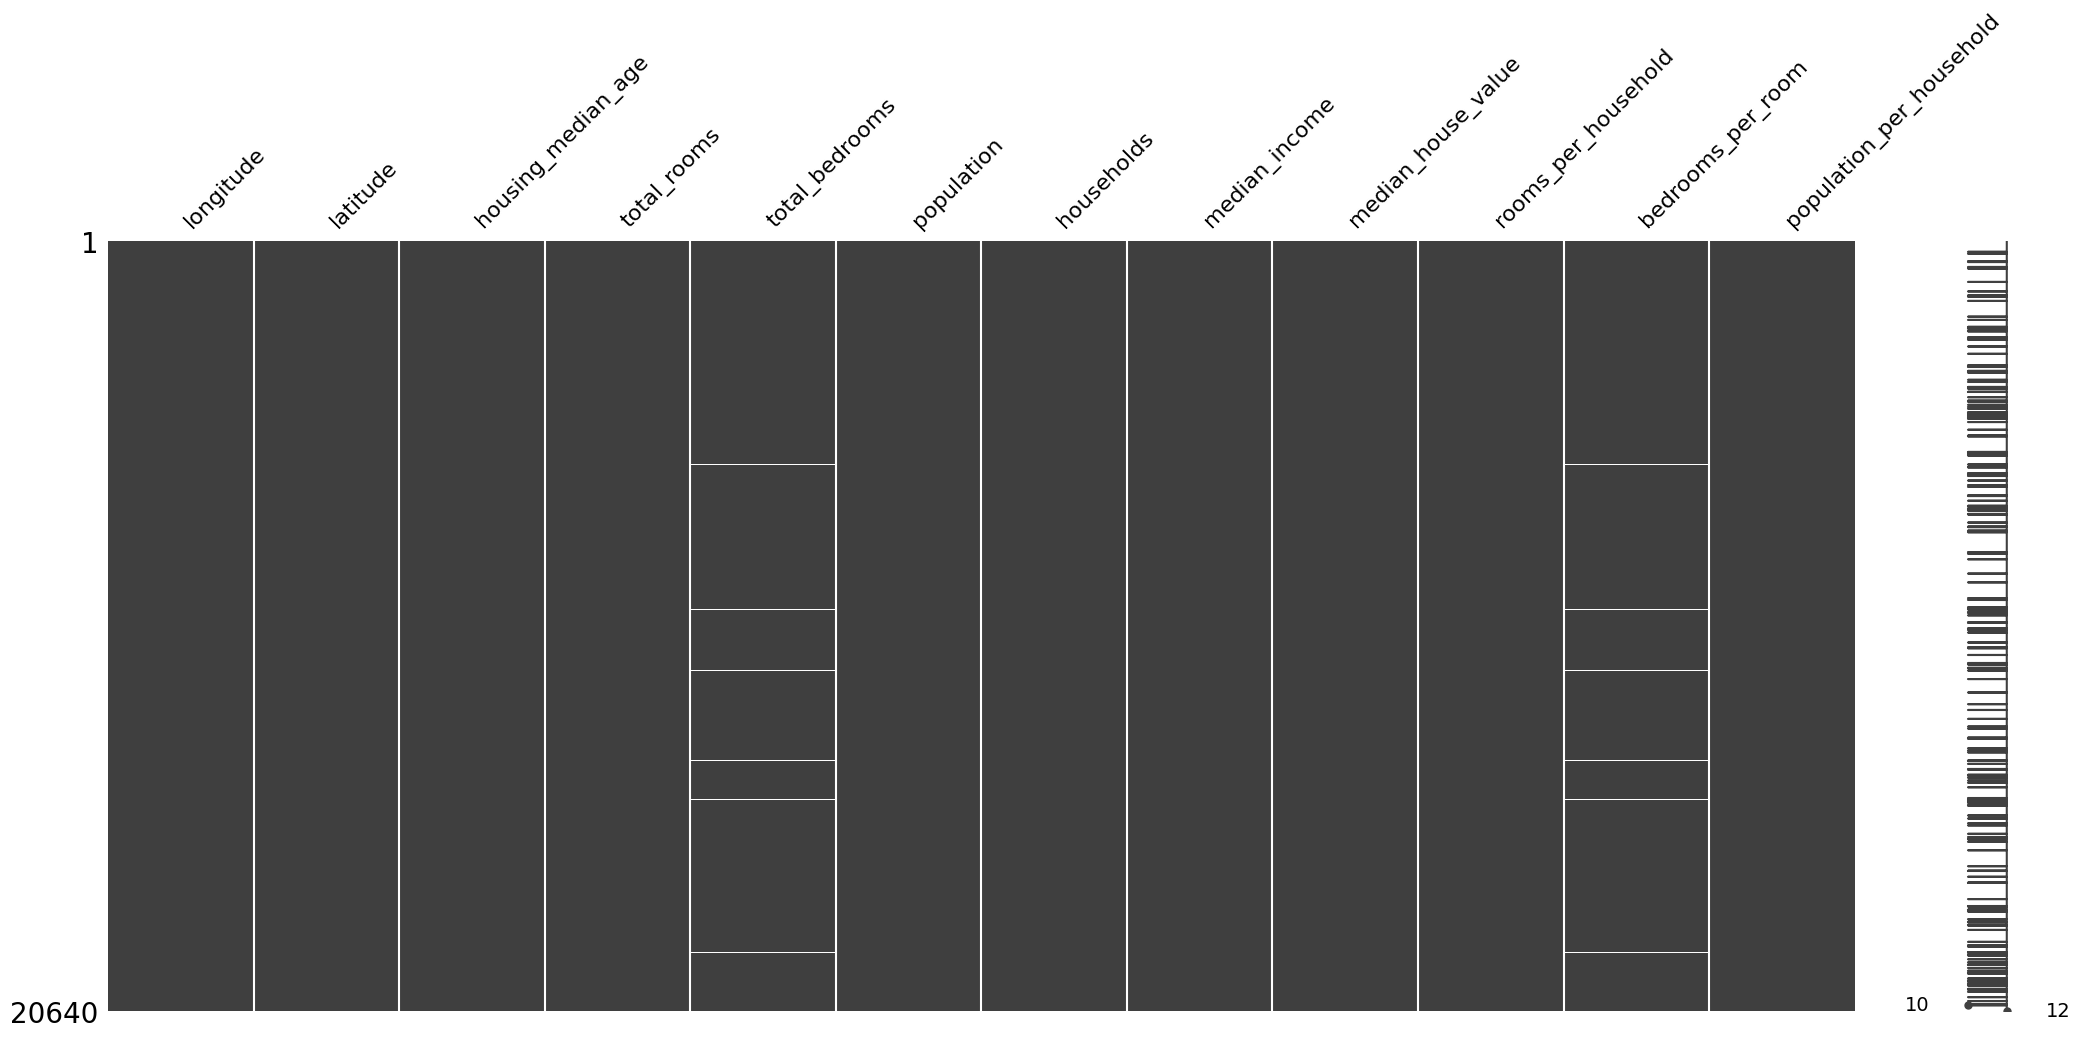

In [196]:
missingno.matrix(num_cols)

In [14]:
#preprocessing
#simple imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer (strategy='median')
num_col= x_train_full.select_dtypes(include=['int32','float32','int64','float64']).columns
imputer .fit(x_train_full[num_col])

SimpleImputer(strategy='median')

In [15]:
#this is median
imputer.statistics_

array([-1.18510000e+02,  3.42650000e+01,  2.90000000e+01,  2.13100000e+03,
        4.37000000e+02,  1.16800000e+03,  4.10500000e+02,  3.54090000e+00,
        5.23456397e+00,  2.02876796e-01,  2.81793691e+00])

In [16]:
df[num_col].median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [17]:

x_train_filled  = imputer.transform(x_train_full[num_col])
x_test_filled  = imputer.transform(x_test_full[num_col])
pd.DataFrame(x_train_filled,columns=num_col).isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [18]:
# prompt:  i want add this column x_train_full[ 'ocean_proxemity'] to x_train_filled and x_test_filled
import pandas as pd
# Create DataFrames from the NumPy arrays
x_train_filled = pd.DataFrame(x_train_filled, columns=num_col)
x_test_filled = pd.DataFrame(x_test_filled, columns=num_col)

In [19]:
#standarization or zscore
from sklearn.preprocessing import StandardScaler , OneHotEncoder
scaler = StandardScaler()
scaler.fit(x_train_filled[num_col])

StandardScaler()

In [247]:
scaler.mean_

array([-1.19581640e+02,  3.56432091e+01,  2.85830483e+01,  2.63827776e+03,
        5.38051699e+02,  1.42623353e+03,  4.99773313e+02,  3.87451445e+00,
        5.43589847e+00,  2.12891898e-01,  3.08818392e+00])

In [248]:
#standard deviasion
scaler.scale_

array([2.00549731e+00, 2.13673849e+00, 1.26079583e+01, 2.17454255e+03,
       4.18376995e+02, 1.13436104e+03, 3.80732950e+02, 1.89541311e+00,
       2.53486770e+00, 5.79626516e-02, 1.12343237e+01])

In [20]:
#pipline
from sklearn.pipeline import Pipeline
num_pipline = Pipeline([('imputer',imputer),('scaler',scaler)])
num_pipline.fit(x_train_filled[num_col])

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [21]:
x_train_num = num_pipline.transform(x_train_filled[num_col])
x_test_num = num_pipline.transform(x_test_filled[num_col])

In [22]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder  = LabelEncoder()
x_train_filled ['ocean_proximity'] = df['ocean_proximity']
x_test_filled ['ocean_proximity'] = df['ocean_proximity']
cat_cols = x_train_filled.select_dtypes(include='object').columns
lbl_encoder.fit(x_train_filled[cat_cols])

LabelEncoder()

In [252]:
# labelencoder
#ahmed mohamed sara mostafa yousef ahmed sara mostafa ziad ahmed
# 1     2       3     4       5      1    3      4      0    1
lbl_encoder.classes_


array(['1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [23]:
x_train_encodeing  = lbl_encoder.transform(x_train_filled[cat_cols])
x_test_encodeing  = lbl_encoder.transform(x_test_filled[cat_cols])

In [24]:
ohe = OneHotEncoder()
ohe.fit(x_train_filled[cat_cols].values)
x_train_ohe = ohe.transform(x_train_filled[cat_cols])
x_test_ohe = ohe.transform(x_test_filled[cat_cols])

In [25]:
cate_pipline = Pipeline([('Imputer', SimpleImputer(strategy='constant',fill_value='missing')), ('ohe',OneHotEncoder(sparse_output= False ))])
cate_pipline.fit(x_train_filled[cat_cols])
x_train_category = cate_pipline.transform(x_train_filled[cat_cols])
x_test_category = cate_pipline.transform(x_test_filled[cat_cols])

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]


In [27]:
from sklearn.compose import ColumnTransformer

In [28]:
categ_pipline = Pipeline([('selector',DataFrameSelector(cat_cols)),('Imputer', SimpleImputer(strategy='constant',fill_value='missing')), ('ohe',OneHotEncoder(sparse_output= False ))])
nums_pipline = Pipeline([('selector',DataFrameSelector(num_col)),('imputer',imputer),('scaler',scaler)])
total_pipline  = FeatureUnion([('num_pipline',nums_pipline),('cate_pipline',categ_pipline)])
x_train_final = total_pipline.fit_transform(x_train_filled)
x_test_final = total_pipline.transform(x_test_filled)

In [29]:
num_col.shape
x_train_final.shape

(17544, 16)

array([[ 0.28503676,  0.1950594 , -0.28418942, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.06065351, -0.23550335,  0.1123855 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.42526222,  1.0093846 ,  1.85731512, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.20026975, -0.67074613,  1.38142522, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.08284386, -0.66138607, -0.91870928, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83851543, -0.70818637,  0.66759038, ...,  0.        ,
         0.        ,  0.        ]])

#Building models

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
lin_reg = LinearRegression()
lin_reg.fit(x_train_final,y_train_full)

LinearRegression()

In [51]:
lin_reg.coef_ , lin_reg.intercept_ # this is thetas


(array([  2508.73349741,   2042.43159771, -10010.70646821,   1905.68047336,
          3553.86089974, -83344.94468826, -87729.12823191,  14702.5712601 ,
          4769.16820251,   9461.89627061, -47181.04140256,  37862.82632915,
         81390.41324654,   6989.79749674,  18624.00783157,    624.82077797]),
 np.float64(204410.9550169104))

In [52]:
mse_lin = cross_val_score(estimator=lin_reg,X=x_train_final,y=y_train_full,scoring='neg_mean_squared_error',cv=5)*-1
mse_lin = mse_lin**.5
mse_lin.mean()

np.float64(68598.59260618873)

In [53]:
y_pred_val = cross_val_predict(estimator=lin_reg,X=x_train_final,y=y_train_full,cv=5)
mse_lin = mean_squared_error(y_train_full,y_pred_val)
mse_lin = mse_lin**.5
mse_lin

68618.68868556214

#SGDReggressor

In [54]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor (max_iter = 10000 , eta0 = .0001, penalty="l2", random_state= 42, shuffle = True,tol = 0.0001)
sgd_reg.fit(x_train_final,y_train_full)


SGDRegressor(eta0=0.0001, max_iter=10000, random_state=42, tol=0.0001)

In [55]:
y_pred_val = cross_val_predict(estimator=sgd_reg,X=x_train_final,y=y_train_full,cv=5,n_jobs=-1)
mse_sgd = mean_squared_error(y_train_full,y_pred_val)
mse_sgd = mse_sgd**.5
mse_sgd


68619.29662105419

#Ridge


In [56]:
ridge_reg = Ridge (alpha = .9, solver = 'svd')
ridge_reg.fit(x_train_final, y_train_full)
y_pred_ridge  = cross_val_predict(estimator = ridge_reg , cv = 5 , X = x_train_final, y = y_train_full, n_jobs = -1 , method ='predict')
mse_ridge = mean_squared_error(y_train_full,y_pred_ridge)
mse_ridge = mse_ridge**.5
mse_ridge

68618.18321974468

#lasso

In [57]:
ls_reg =  Lasso (alpha = .9,max_iter= 10000)
ls_reg.fit(x_train_final,y_train_full)
ls_reg.coef_ , ls_reg.intercept_
y_predict = cross_val_predict(estimator = ls_reg , cv = 5 , X = x_train_final, y = y_train_full, n_jobs = -1 , method ='predict')
mse_ls = mean_squared_error(y_train_full,y_predict)
mse_ls = mse_ls**.5
mse_ls

68618.44716913572

#polynomial reggresion  


In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_reg.fit_transform(x_train_final)
x_test_poly = poly_reg.transform(x_test_final)
x_train_poly .shape ## (n+d)! / n*d! == 170



(17544, 152)

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly,y_train_full)
y_predict = lin_reg.predict(x_train_poly)
mse_lin = mean_squared_error(y_train_full,y_predict)
mse_lin = mse_lin**.5
mse_lin

61082.943875228986

In [60]:
# prompt: MODEL KNN

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming x_train_final, y_train_full, x_test_final, and y_test_full are defined as in the previous code.

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=6, weights = 'distance', p =2 )  # You can adjust the number of neighbors p  =2 marhatin destance

# Train the model
knn_regressor.fit(x_train_final, y_train_full)

# Make predictions on the training set
y_pred_valid= cross_val_predict(estimator = knn_regressor, cv = 5, n_jobs=-1 , method  ='predict', X=x_train_final , y=y_train_full)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train_full, y_pred_valid)
rmse_train = mse_train**0.5
print(f"validation RMSE: {rmse_train}")



validation RMSE: 67394.58475201279


#Randomforest


In [61]:
from sklearn.ensemble  import RandomForestRegressor

In [62]:
rfg_model = RandomForestRegressor(max_depth = 6 , bootstrap= True ,n_estimators=150,max_samples = .8  )
rfg_model.fit(x_train_final, y_train_full) #bootstrap using to subset the basic dataset to branch dataset and predict result all of brance then obtain mean of results
y_predict = cross_val_predict(estimator = rfg_model, cv = 5, n_jobs=-1 , method  ='predict', X=x_train_final , y=y_train_full)
mse_rfg = mean_squared_error(y_train_full,y_predict)
mse_rfg = mse_rfg**.5
mse_rfg

62862.02002780898

#tune parameter


In [63]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [64]:
# greidsearchcv vs randomizesearchcv
best_paramterize_search ={ 'max_depth': np.arange (5,20,4),
    'n_estimators':np.arange(100,500,100),
    'max_samples':[0.7,0.8,0.9,1]
}
random_search = RandomizedSearchCV(estimator=rfg_model, param_distributions=best_paramterize_search,cv=2, random_state= 442 ,scoring = 'neg_mean_squared_error',verbose = True  )
random_search.fit(x_train_final,y_train_full)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150),
                   param_distributions={'max_depth': array([ 5,  9, 13, 17]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 200, 300, 400])},
                   random_state=442, scoring='neg_mean_squared_error',
                   verbose=True)

In [65]:
random_search. best_params_

{'n_estimators': np.int64(400), 'max_samples': 0.8, 'max_depth': np.int64(17)}

In [66]:
best_randomeforest =  random_search.best_estimator_

In [67]:
y_predict_forest  = cross_val_predict(estimator = best_randomeforest, cv = 5, n_jobs=-1 , method  ='predict', X=x_train_final , y=y_train_full)
mse_forest  = mean_squared_error(y_train_full , y_predict_forest)
rmse = np.sqrt(mse_forest)
rmse

np.float64(51289.38865680167)

In [314]:
feat_import_forest = {}
for name,score in zip (concatinate,best_randomeforest.feature_importances_):
  feat_import_forest[name] = score
feat_import_forest


{'NEAR BAY': np.float64(0.0018855602456107822),
 '1H OCEAN': np.float64(0.0016963767566755814),
 'INLAND': np.float64(3.622107124913544e-06),
 'NEAR OCEAN': np.float64(0.0016006225508396503),
 'ISLAND': np.float64(0.0015682951899481917),
 'longitude': np.float64(0.08245824438387192),
 'latitude': np.float64(0.08304908756647902),
 'housing_median_age': np.float64(0.05160630876685762),
 'total_rooms': np.float64(0.012356332555268445),
 'total_bedrooms': np.float64(0.011949492338427408),
 'population': np.float64(0.012930736168796836),
 'households': np.float64(0.011168699454651503),
 'median_income': np.float64(0.5274513021912779),
 'rooms_per_household': np.float64(0.03341963705305862),
 'bedrooms_per_room': np.float64(0.032030815530674654),
 'population_per_household': np.float64(0.13482486714043698)}

In [315]:
key = feat_import_forest.keys()
value = feat_import_forest.values()
pd.DataFrame({'key':key,'value':value}).sort_values('value',ascending=False)

,key,value
12,median_income,0.527451
15,population_per_household,0.134825
6,latitude,0.083049
5,longitude,0.082458
7,housing_median_age,0.051606
13,rooms_per_household,0.033420
14,bedrooms_per_room,0.032031
10,population,0.012931
8,total_rooms,0.012356
9,total_bedrooms,0.011949


#XGboost

In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

In [35]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 429.7 kB/s eta 0:05:48
   ---------------------------------------- 0.5/150.0 MB 429.7 kB/s eta 0:05:48
   ---------------------------------------- 0.5/150.0 MB 429.7 kB/s eta 0:05:48
   ---------------------------------------- 0.8/150.0 MB 430.1 kB/s eta 0:05:47
   ---------------------------------------- 0.8/150.0 MB 430.1 kB/s eta 0:05:47
   ---------------------------------------- 0.8/150.0 MB 430.1 kB/s eta 0:05:47
   ---------------------------------------- 1.0/150.0 MB 433.8 kB/s eta 0:05:44
   -----------

In [39]:
#model xgboost
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(max_depth= 10 , n_estimators = 450,learning_rate = .05,colsample_bytree = .8, subsample = .8 , gamma = 3  , reg_alpha=1 ) #  n_estimator -->  this is count of trees and max_depth -->this is the max of level from tree , learning_rate = .1
xgb_reg . fit (x_train_final, y_train_full)
y_predict_xgb = cross_val_predict(estimator = xgb_reg, cv = 5, n_jobs=-1 , method  ='predict', X=x_train_final , y=y_train_full , verbose= True)
mse_xgb = mean_squared_error(y_train_full , y_predict_xgb)
rmse = np.sqrt(mse_xgb)
rmse
#colsample_bytree number of feature to each tree -- gamma is the lowerbounded from divided node -- regalpha less from overfiting because less than from feature dont important
#subsample -->this is amount of data to all one of tree -- reg_lambda to less from feature have high score


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.6s finished


45156.78003345708

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [42]:
xgb_best_paramters = {'learning_rate':[.05,.06,.07], 'max_depth':np.arange(3,10,1), 'n_estimators':np.arange(300,400,50), 'subsample':[.8,.9]}
xgb_random_search =RandomizedSearchCV(estimator=xgb_reg,  param_distributions= xgb_best_paramters , cv =2, verbose = True , scoring = 'neg_mean_squared_error')
xgb_random_search.fit(x_train_final,y_train_full)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=3,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=No...
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=450,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.05, 0.06, 0.07],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([300, 350]),
                                        'subsample': [0.8, 0.9]},
                   scoring='neg_mean_squared_error', verbose=True)

In [43]:
y_predct_xgb = cross_val_predict(estimator = xgb_random_search.best_estimator_, cv = 5, n_jobs=-1 , method  ='predict', X=x_train_final , y=y_train_full)
mse_xgb = mean_squared_error(y_train_full , y_predct_xgb)
rmse = np.sqrt(mse_xgb)
rmse

45106.98120400083

In [46]:
x_train_final.shape

(17544, 16)

In [44]:
best_model = xgb_random_search.best_estimator_

In [47]:
best_model.predict(x_train_final)

array([258177.92, 226668.7 , 148505.28, ..., 217941.25, 276624.53,
       327294.3 ], dtype=float32)

#voting

In [322]:
'''
xgb , RFST, SGD
100  ,   80 , 56 # 98
the closet to correct xgb but
in voting give you average between this model
'''
np.mean([100,80,56]) # the average is 78.666 so that give you accurcy is bad

np.float64(78.66666666666667)

In [324]:
from sklearn.ensemble import VotingRegressor
voting = VotingRegressor (estimators = [('xgb',best_model), ("RFST",best_randomeforest) ])
voting.fit(x_train_final, y_train_full )

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=3, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.0...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None,
                                          max_depth=np.int64(7),
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=np.int64(350),
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('RFST',
                             RandomForestRegressor(max_depth=np.int64(17),
                                                   max_samples=0.8,
                                                   n_estimators=np.int64(400)))])

In [333]:
y_predict = cross_val_predict(estimator = voting, cv = 5, n_jobs=-1 , method  ='predict', X=x_train_final , y=y_train_full)

In [334]:
mse = mean_squared_error(y_train_full , y_predict)
rmse = np.sqrt(mse)
rmse

np.float64(47255.049452498526)

In [45]:
jb.dump(best_model , 'xgb.pkl')


['xgb.pkl']